In [130]:
%load_ext autoreload
%autoreload 2
from src.core.timeseries_evaluation import get_quantile_scores, get_crps_scores, get_empirical_coverage_rates, get_crps_by_period, plot_crps, load_predictions, plot_crps_across_lead_times
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# Evaluation Results for energy consumption

In [133]:
results = load_predictions(prediction_dirs="./results/energy_consumption/pipeline/")

2025-05-31 13:45:26,774 - INFO - <string> - Loading predictions by searching in provided directories...
2025-05-31 13:45:26,786 - INFO - <string> - Common path identified: results/energy_consumption/pipeline
2025-05-31 13:45:26,990 - INFO - <string> - Loaded prediction file: `results/energy_consumption/pipeline/seasonal_rolling/backtest/PostprocessorQR/predictions.joblib` as key: seasonal_rolling_PostprocessorQR
2025-05-31 13:45:27,119 - INFO - <string> - Loaded prediction file: `results/energy_consumption/pipeline/seasonal_rolling/backtest/PostprocessorEQC/predictions.joblib` as key: seasonal_rolling_PostprocessorEQC
2025-05-31 13:45:27,245 - INFO - <string> - Loaded prediction file: `results/energy_consumption/pipeline/seasonal_rolling/backtest/PostprocessorMLE/predictions.joblib` as key: seasonal_rolling_PostprocessorMLE
2025-05-31 13:45:27,362 - INFO - <string> - Loaded prediction file: `results/energy_consumption/pipeline/seasonal_rolling/backtest/RollingSeasonalQuantilePredictor/

In [134]:
crps_results = get_crps_scores(results, reference_predictions="chronos-bolt-zero-shot_Chronos")

In [135]:
crps_results

chronos-bolt-finetuned-full_PostprocessorQR  \
lead times                                                
1                                              0.931241   
2                                              0.906677   
3                                              0.907116   
4                                              0.910214   
5                                              0.913249   
...                                                 ...   
189                                            0.929089   
190                                            0.929221   
191                                            0.928970   
192                                            0.929595   
Mean CRPS                                      0.918502   

            chronos-bolt-finetuned-full_PostprocessorMLE  \
lead times                                                 
1                                               0.920661   
2                                               0.903984   
3                                               0.906587   
4                                               0.910191   
5                                               0.913651   
...                                                  ...   
189                                             0.930723   
190                                             0.931093   
191                                             0.930403   
192                                             0.931058   
Mean CRPS                                       0.921452   

            chronos-bolt-finetuned-full_PostprocessorEQC  \
lead times                                                 
1                                               0.946699   
2                                               0.914174   
3                                               0.910918   
4                                               0.912667   
5                                               0.915474   
...                                                  ...   
189                                             0.933955   
190                                             0.933850   
191                                             0.933849   
192                                             0.934580   
Mean CRPS                                       0.923679   

            chronos-bolt-finetuned-lora_PostprocessorQR  \
lead times                                                
1                                              0.949342   
2                                              0.967615   
3                                              0.970508   
4                                              0.967437   
5                                              0.965635   
...                                                 ...   
189                                            0.952533   
190                                            0.953009   
191                                            0.952401   
192                                            0.952840   
Mean CRPS                                      0.939739   

            chronos-bolt-finetuned-lora_PostprocessorMLE  \
lead times                                                 
1                                               0.930189   
2                                               0.960570   
3                                               0.966603   
4                                               0.966223   
5                                               0.965675   
...                                                  ...   
189                                             0.957462   
190                                             0.957646   
191                                             0.956956   
192                                             0.956915   
Mean CRPS                                       0.944030   

            chronos-bolt-finetuned-lora_PostprocessorEQC  \
lead times                                                 
1            

In [ ]:
# make a bar chart with the mean crps results

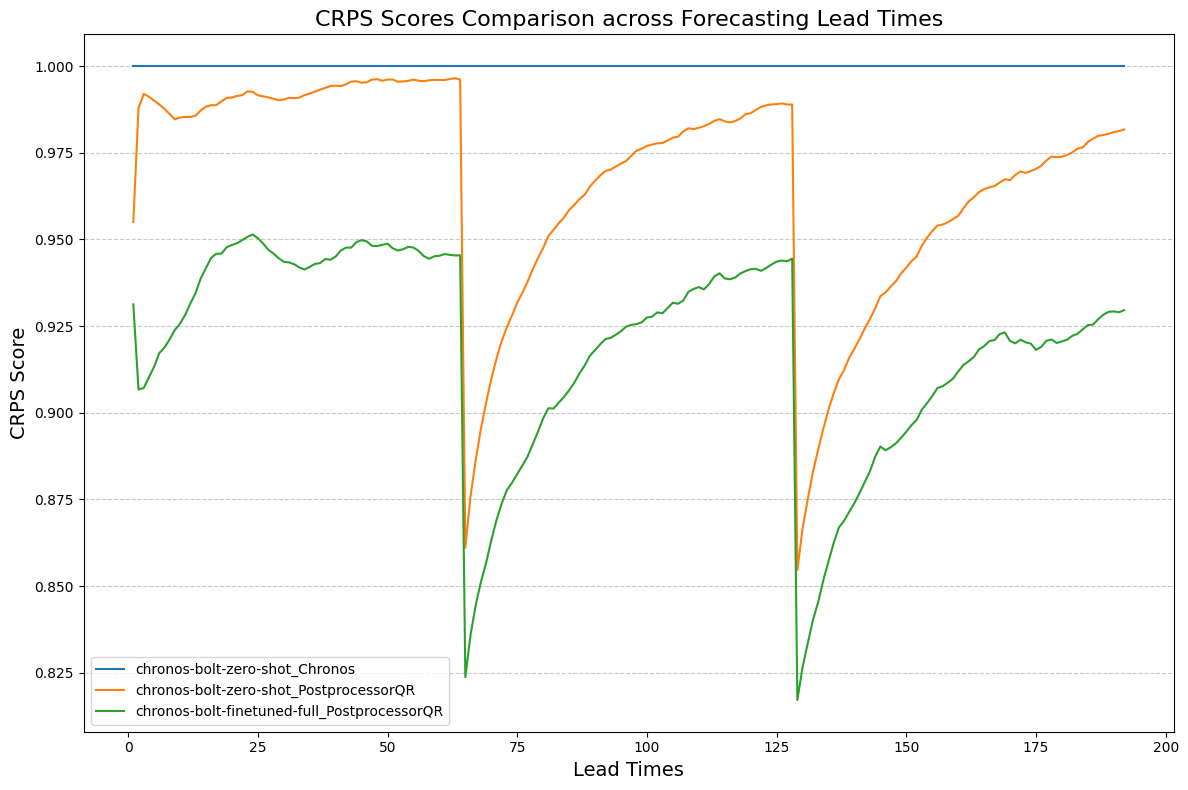

In [136]:
plot_crps_across_lead_times(results, 
                            selected_keys=["chronos-bolt-zero-shot_Chronos", 
                                            "chronos-bolt-zero-shot_PostprocessorQR",
                                            "chronos-bolt-finetuned-full_PostprocessorQR",
                                            # "seasonal_rolling_RollingSeasonalQuantilePredictor"
                                            ],
                            reference_predictions="chronos-bolt-zero-shot_Chronos")

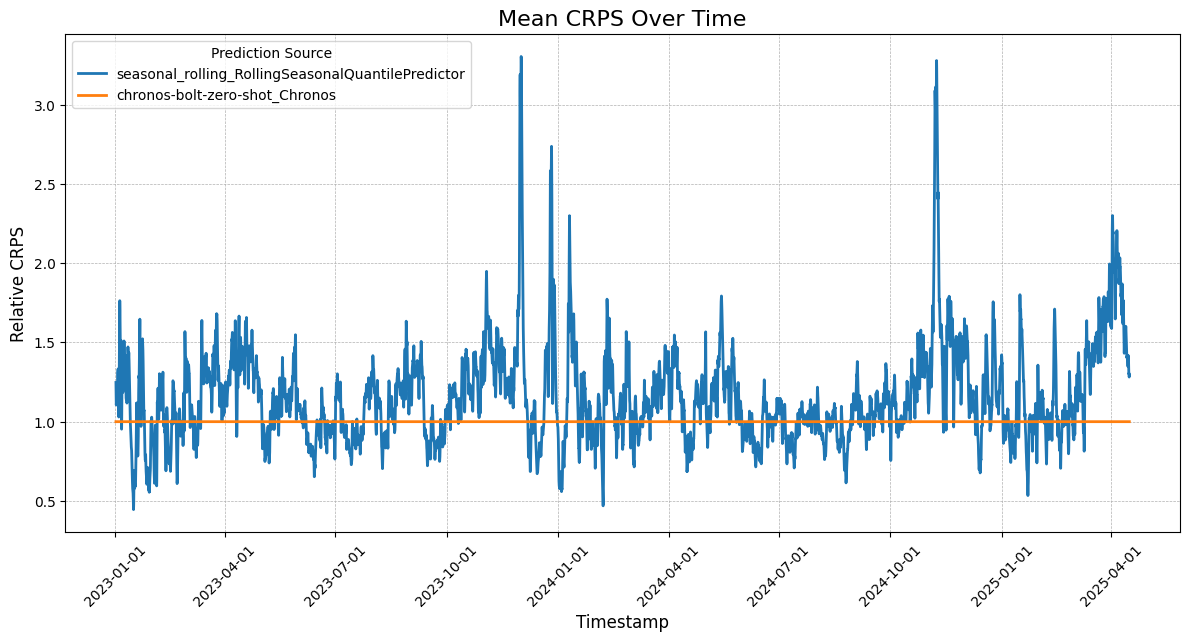

In [141]:
plot_crps(results, selected_keys = ["seasonal_rolling_RollingSeasonalQuantilePredictor",
                                    "chronos-bolt-zero-shot_Chronos"], rolling_window_eval=10, reference_predictions="chronos-bolt-zero-shot_Chronos")

In [143]:
quantile_scores = get_quantile_scores(results, reference_predictions="chronos-bolt-zero-shot_Chronos")

In [144]:
quantile_scores

chronos-bolt-finetuned-full_PostprocessorQR  \
quantile                                                     
0.1                                               0.843399   
0.2                                               0.911208   
0.3                                               0.939578   
0.4                                               0.950068   
0.5                                               0.947656   
0.6                                               0.936182   
0.7                                               0.916028   
0.8                                               0.885189   
0.9                                               0.830074   
Mean (CRPS/2)                                     0.916239   

               chronos-bolt-finetuned-full_PostprocessorMLE  \
quantile                                                      
0.1                                                0.863556   
0.2                                                0.918831   
0.3                                                0.939668   
0.4                                                0.946579   
0.5                                                0.944737   
0.6                                                0.934821   
0.7                                                0.917359   
0.8                                                0.891748   
0.9                                                0.845377   
Mean (CRPS/2)                                      0.919292   

               chronos-bolt-finetuned-full_PostprocessorEQC  \
quantile                                                      
0.1                                                0.857547   
0.2                                                0.918580   
0.3                                                0.943205   
0.4                                                0.952727   
0.5                                                0.950853   
0.6                                                0.939971   
0.7                                                0.920670   
0.8                                                0.891246   
0.9                                                0.839228   
Mean (CRPS/2)                                      0.921595   

               chronos-bolt-finetuned-lora_PostprocessorQR  \
quantile                                                     
0.1                                               0.874507   
0.2                                               0.936640   
0.3                                               0.962746   
0.4                                               0.970644   
0.5                                               0.966377   
0.6                                               0.954254   
0.7                                               0.934255   
0.8                                               0.903092   
0.9                                               0.848066   
Mean (CRPS/2)                                     0.937136   

               chronos-bolt-finetuned-lora_PostprocessorMLE  \
quantile                                                      
0.1                                                0.892805   
0.2                                                0.944600   
0.3                                                0.964034   
0.4                                                0.969042   
0.5                                                0.965239   
0.6                                                0.954936   
0.7                                                0.937981   
0.8                                                0.911585   
0.9                                                0.865201   
Mean (CRPS/2)                                      0.941614   

               chronos-bolt-finetuned-lora_PostprocessorEQC  \
quantile                                                      
0.1                                                0.895646   
0.2                                                0.947004   
0.

In [145]:
coverage_rates = get_empirical_coverage_rates(results)

In [147]:
coverage_rates

seasonal_rolling_PostprocessorQR  seasonal_rolling_PostprocessorEQC  \
quantile                                                                        
0.1                               0.134550                           0.108982   
0.2                               0.242621                           0.211211   
0.3                               0.348196                           0.318426   
0.4                               0.452578                           0.418981   
0.5                               0.552896                           0.521355   
0.6                               0.644238                           0.622119   
0.7                               0.730513                           0.711672   
0.8                               0.816230                           0.802339   
0.9                               0.907906                           0.897829   

          seasonal_rolling_PostprocessorMLE  \
quantile                                      
0.1                                0.120705   
0.2                                0.213110   
0.3                                0.311971   
0.4                                0.428099   
0.5                                0.542768   
0.6                                0.646381   
0.7                                0.743319   
0.8                                0.831681   
0.9                                0.921765   

          seasonal_rolling_RollingSeasonalQuantilePredictor  \
quantile                                                      
0.1                                                0.197802   
0.2                                                0.289304   
0.3                                                0.377985   
0.4                                                0.456037   
0.5                                                0.530814   
0.6                                                0.602628   
0.7                                                0.668477   
0.8                                                0.735794   
0.9                                                0.801551   

          chronos-bolt-finetuned-lora_Chronos  \
quantile                                        
0.1                                  0.161966   
0.2                                  0.256242   
0.3                                  0.335140   
0.4                                  0.406821   
0.5                                  0.477093   
0.6                                  0.548910   
0.7                                  0.623850   
0.8                                  0.707568   
0.9                                  0.810537   

          chronos-bolt-finetuned-lora_PostprocessorQR  \
quantile                                                
0.1                                          0.115014   
0.2                                          0.220228   
0.3                                          0.323358   
0.4                                          0.421316   
0.5                                          0.515608   
0.6                                          0.610053   
0.7                                          0.704480   
0.8                                          0.799896   
0.9                                          0.899807   

          chronos-bolt-finetuned-lora_PostprocessorEQC  \
quantile                                                 
0.1                                           0.097552   
0.2                                           0.198120   
0.3                                           0.302054   
0.4                                           0.403205   
0.5                                           0.500637   
0.6                                           0.596562   
0.7                                           0.692095   
0.8                                           0.788539   
0.9                                           0.891299   

          chronos-bolt-finetuned-lora_PostprocessorMLE  \
quantile                                 

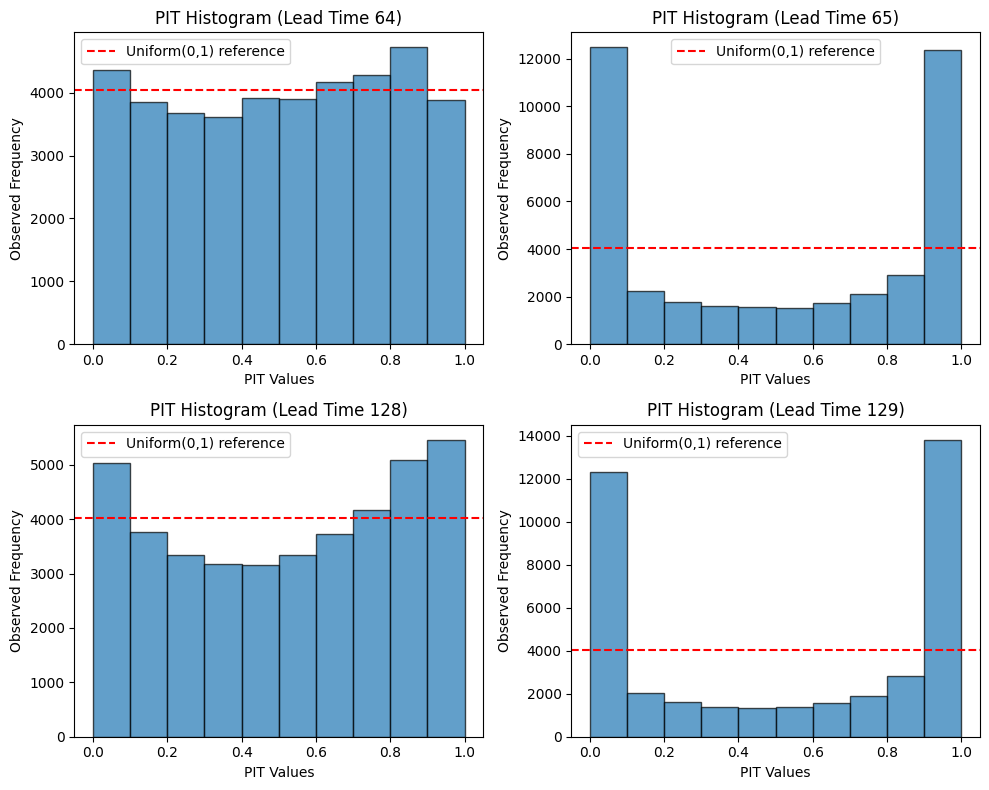

In [148]:
results["chronos-bolt-zero-shot_Chronos"].get_pit_histogram(overlay=False, lead_times=[64,65,128,129])

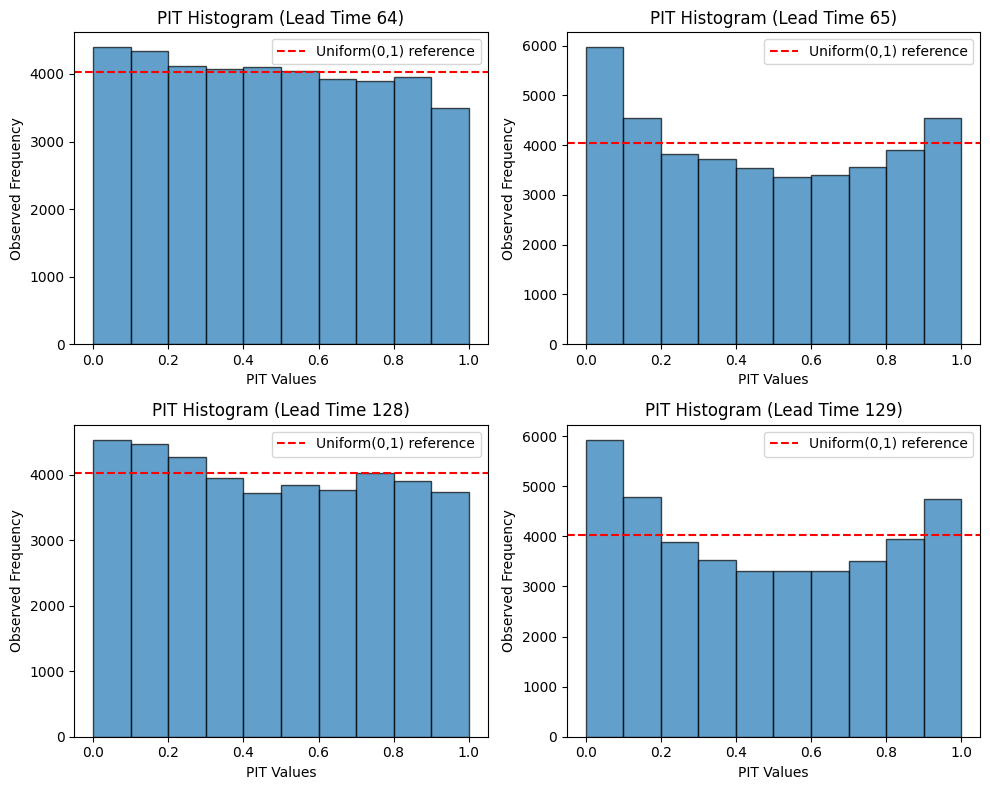

In [149]:
results["chronos-bolt-zero-shot_PostprocessorQR"].get_pit_histogram(overlay=False, lead_times=[64,65,128,129])

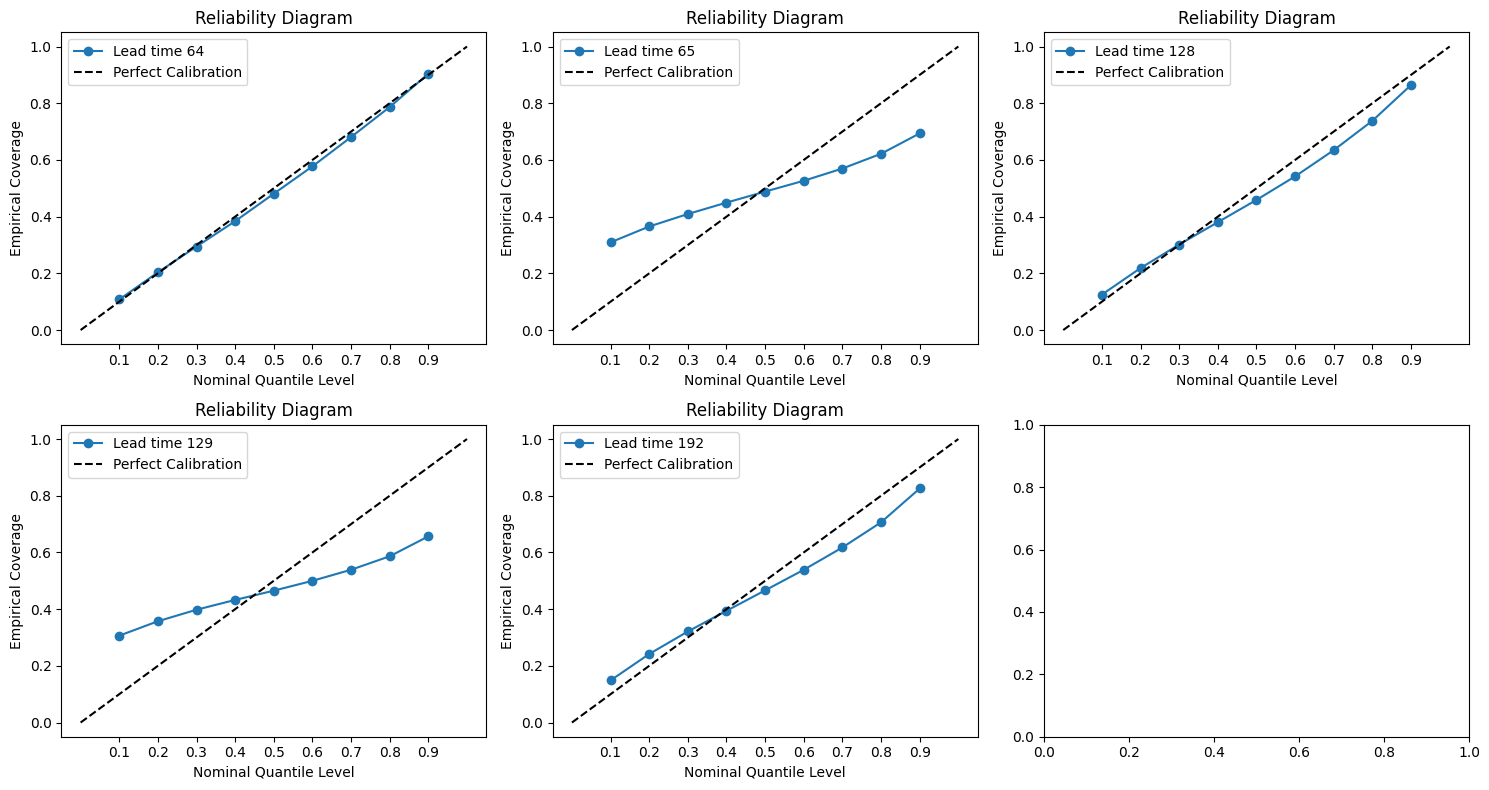

In [150]:
results["chronos-bolt-zero-shot_Chronos"].get_reliability_diagram(overlay=False, lead_times=[64,65,128,129,192])

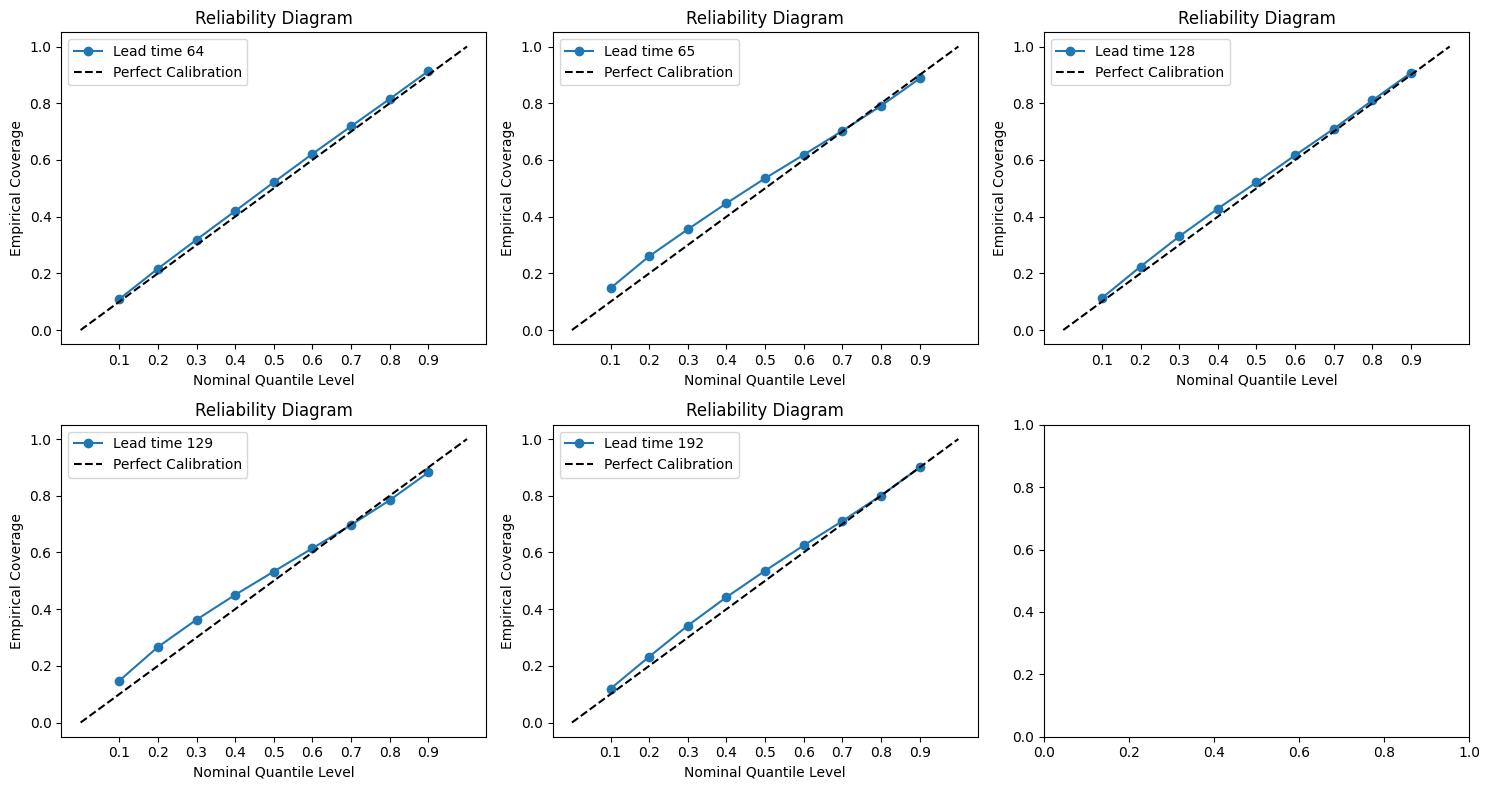

In [151]:
results["chronos-bolt-zero-shot_PostprocessorQR"].get_reliability_diagram(overlay=False, lead_times=[64,65,128,129,192])

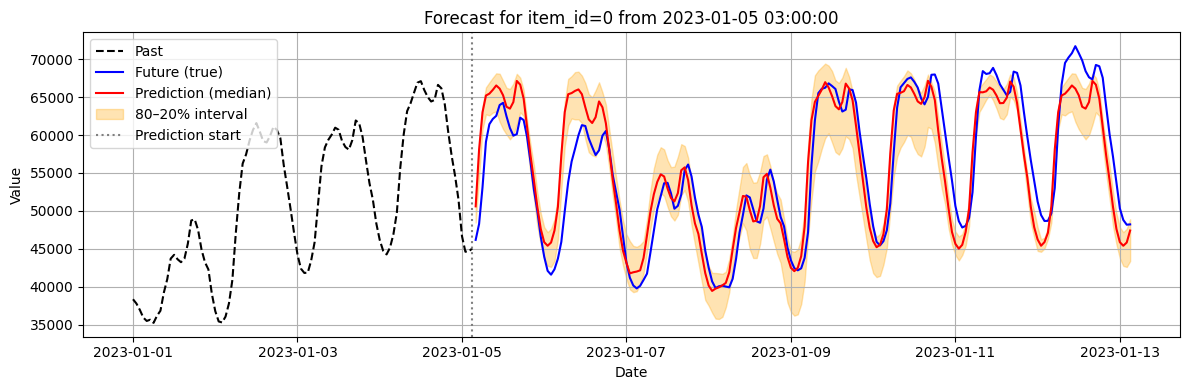

In [152]:
results["seasonal_rolling_RollingSeasonalQuantilePredictor"].item_ids[0].plot_forecasts(start=100)

# Evaluation Wholesale Prices

In [153]:
results = load_predictions(prediction_dirs="./results/wholesale_prices/pipeline/", load=False)

2025-05-31 13:53:53,541 - INFO - <string> - Loading predictions by searching in provided directories...
2025-05-31 13:53:53,555 - INFO - <string> - Common path identified: results/wholesale_prices/pipeline
2025-05-31 13:53:53,556 - INFO - <string> - Found prediction file: `results/wholesale_prices/pipeline/seasonal_rolling/backtest/PostprocessorQR/predictions.joblib` as key: seasonal_rolling_PostprocessorQR
2025-05-31 13:53:53,556 - INFO - <string> - Found prediction file: `results/wholesale_prices/pipeline/seasonal_rolling/backtest/PostprocessorEQC/predictions.joblib` as key: seasonal_rolling_PostprocessorEQC
2025-05-31 13:53:53,557 - INFO - <string> - Found prediction file: `results/wholesale_prices/pipeline/seasonal_rolling/backtest/PostprocessorMLE/predictions.joblib` as key: seasonal_rolling_PostprocessorMLE
2025-05-31 13:53:53,557 - INFO - <string> - Found prediction file: `results/wholesale_prices/pipeline/seasonal_rolling/backtest/RollingSeasonalQuantilePredictor/predictions.jo

2025-05-31 13:53:53,560 - INFO - <string> - Found prediction file: `results/wholesale_prices/pipeline/chronos-bolt-finetuned-lora/backtest/PostprocessorMLE/predictions.joblib` as key: chronos-bolt-finetuned-lora_PostprocessorMLE
2025-05-31 13:53:53,560 - INFO - <string> - Found prediction file: `results/wholesale_prices/pipeline/chronos-bolt-zero-shot/backtest/Chronos/predictions.joblib` as key: chronos-bolt-zero-shot_Chronos
2025-05-31 13:53:53,561 - INFO - <string> - Found prediction file: `results/wholesale_prices/pipeline/chronos-bolt-zero-shot/backtest/PostprocessorQR/predictions.joblib` as key: chronos-bolt-zero-shot_PostprocessorQR
2025-05-31 13:53:53,561 - INFO - <string> - Found prediction file: `results/wholesale_prices/pipeline/chronos-bolt-zero-shot/backtest/PostprocessorEQC/predictions.joblib` as key: chronos-bolt-zero-shot_PostprocessorEQC
2025-05-31 13:53:53,562 - INFO - <string> - Found prediction file: `results/wholesale_prices/pipeline/chronos-bolt-zero-shot/backtest/

In [ ]:
# TODO: 
# lazy loading when calculating the metrics. only provide a file directory instead of the loaded predictions
# train chronos with autogluon and check perfomance -- done
# use all remaining data which was not used for training for calibration.

In [154]:
crps_results = get_crps_scores(results, reference_predictions="chronos-bolt-zero-shot_Chronos")

<string>:19: RuntimeWarning: Mean of empty slice.
/Users/louisskowronek/Documents/thesis/master-thesis/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<string>:19: RuntimeWarning: Mean of empty slice.
/Users/louisskowronek/Documents/thesis/master-thesis/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<string>:19: RuntimeWarning: Mean of empty slice.
/Users/louisskowronek/Documents/thesis/master-thesis/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
<string>:19: RuntimeWarning: Mean of empty slice.
/Users/louisskowronek/Documents/thesis/master-thesis/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in sca

In [155]:
crps_results

chronos-bolt-finetuned-full_PostprocessorEQC  \
lead times                                                 
1                                               0.943015   
2                                               0.948271   
3                                               0.952213   
4                                               0.956407   
5                                               0.958758   
...                                                  ...   
189                                             0.942896   
190                                             0.945286   
191                                             0.945639   
192                                             0.944920   
Mean CRPS                                       0.941601   

            chronos-bolt-finetuned-full_PostprocessorQR  \
lead times                                                
1                                              0.942447   
2                                              0.947078   
3                                              0.950796   
4                                              0.955193   
5                                              0.958002   
...                                                 ...   
189                                            0.954897   
190                                            0.957234   
191                                            0.957549   
192                                            0.957181   
Mean CRPS                                      0.946036   

            chronos-bolt-finetuned-lora_PostprocessorEQC  \
lead times                                                 
1                                               0.962537   
2                                               0.967404   
3                                               0.967586   
4                                               0.967722   
5                                               0.968017   
...                                                  ...   
189                                             0.950937   
190                                             0.953389   
191                                             0.954907   
192                                             0.954969   
Mean CRPS                                       0.947269   

            chronos-bolt-finetuned-lora_PostprocessorQR  \
lead times                                                
1                                              0.958388   
2                                              0.964784   
3                                              0.965148   
4                                              0.965568   
5                                              0.966231   
...                                                 ...   
189                                            0.958452   
190                                            0.961028   
191                                            0.962366   
192                                            0.962826   
Mean CRPS                                      0.948525   

            chronos-bolt-finetuned-last-layer_PostprocessorEQC  \
lead times                                                       
1                                                    0.964448    
2                                                    0.978099    
3                                                    0.981102    
4                                                    0.983612    
5                                                    0.983692    
...                                                       ...    
189                                                  0.957418    
190                                                  0.959174    
191                                                  0.959637    
192                                                  0.959615    
Mean CRPS                                            0.959023    

            chronos-bolt-finetuned-last-layer_Postproce

Compute CRPS score:: 100%|██████████| 4/4 [00:54<00:00, 13.71s/it]


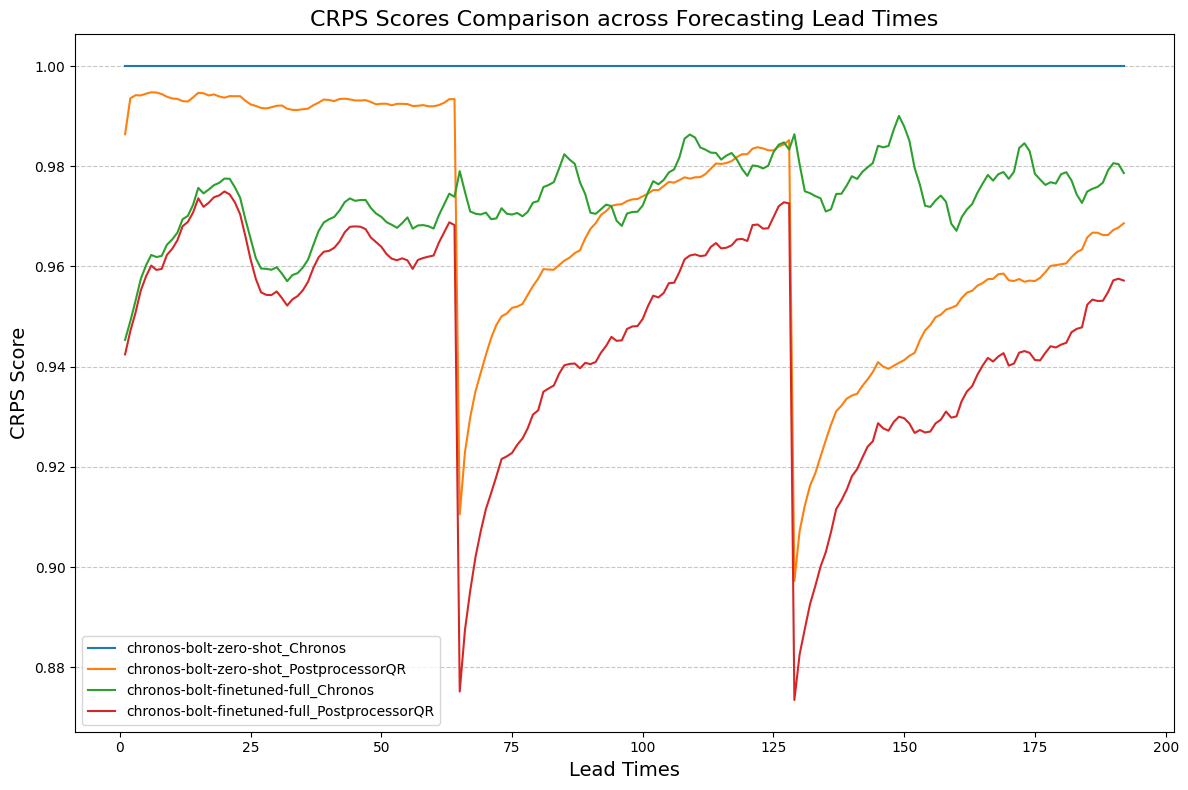

In [157]:
plot_crps_across_lead_times(results, 
                            selected_keys=["chronos-bolt-zero-shot_Chronos", 
                                            "chronos-bolt-zero-shot_PostprocessorQR",
                                            "chronos-bolt-finetuned-full_Chronos",
                                            "chronos-bolt-finetuned-full_PostprocessorQR",
                                            ],
                            reference_predictions="chronos-bolt-zero-shot_Chronos")

In [ ]:
results["seasonal_rolling_RollingSeasonalQuantilePredictor"].item_ids[0].plot_forecasts(start=100)

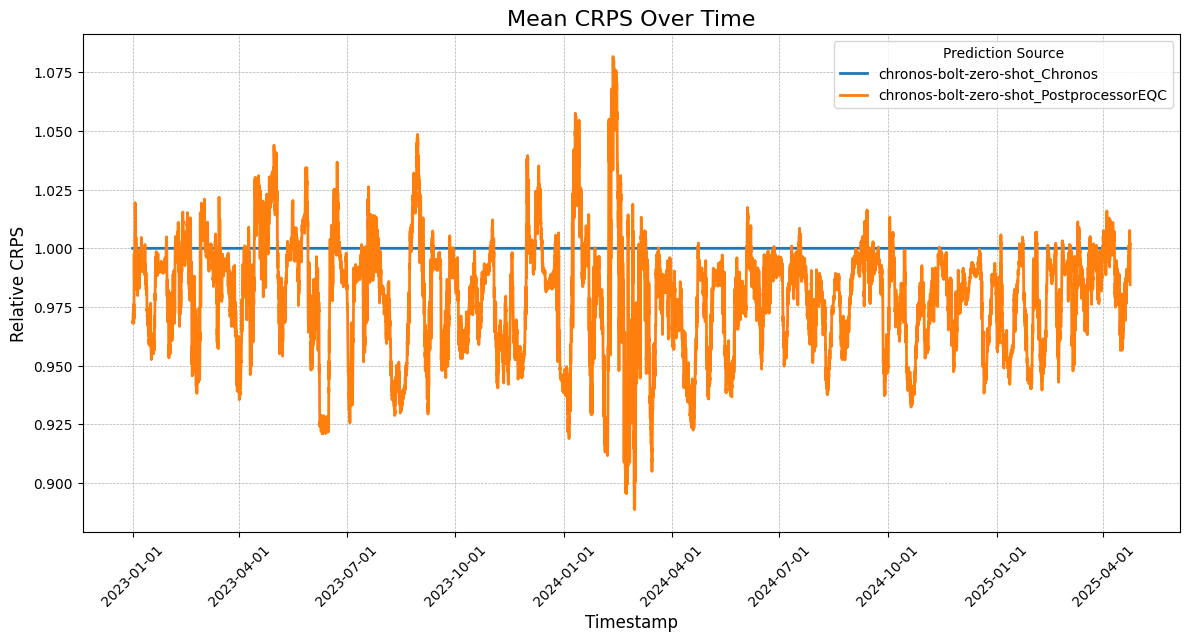

In [54]:
# update offset not only once on a calibration dataset but continously update it
plot_crps(predictions=results, selected_keys=["chronos-bolt-zero-shot_PostprocessorEQC", "chronos-bolt-zero-shot_Chronos"], reference_predictions="chronos-bolt-zero-shot_Chronos")

# Evaluation Exchange Rates

In [159]:
results = load_predictions(prediction_dirs="./results/exchange_rates/pipeline/", load=True)

2025-05-31 14:04:53,971 - INFO - <string> - Loading predictions by searching in provided directories...


2025-05-31 14:04:53,986 - INFO - <string> - Common path identified: results/exchange_rates/pipeline
2025-05-31 14:04:54,076 - INFO - <string> - Loaded prediction file: `results/exchange_rates/pipeline/seasonal_rolling/backtest/PostprocessorQR/predictions.joblib` as key: seasonal_rolling_PostprocessorQR
2025-05-31 14:04:54,148 - INFO - <string> - Loaded prediction file: `results/exchange_rates/pipeline/seasonal_rolling/backtest/PostprocessorEQC/predictions.joblib` as key: seasonal_rolling_PostprocessorEQC
2025-05-31 14:04:54,219 - INFO - <string> - Loaded prediction file: `results/exchange_rates/pipeline/seasonal_rolling/backtest/PostprocessorMLE/predictions.joblib` as key: seasonal_rolling_PostprocessorMLE
2025-05-31 14:04:54,287 - INFO - <string> - Loaded prediction file: `results/exchange_rates/pipeline/seasonal_rolling/backtest/RollingSeasonalQuantilePredictor/predictions.joblib` as key: seasonal_rolling_RollingSeasonalQuantilePredictor
2025-05-31 14:04:54,360 - INFO - <string> - Lo

In [160]:
get_empirical_coverage_rates(results)

seasonal_rolling_PostprocessorQR  seasonal_rolling_PostprocessorEQC  \
quantile                                                                        
0.1                               0.117903                           0.037968   
0.2                               0.232995                           0.161053   
0.3                               0.346622                           0.303505   
0.4                               0.467441                           0.423633   
0.5                               0.598344                           0.572567   
0.6                               0.732719                           0.713784   
0.7                               0.837219                           0.840823   
0.8                               0.910333                           0.921989   
0.9                               0.963327                           0.969700   

          seasonal_rolling_PostprocessorMLE  \
quantile                                      
0.1                                0.056119   
0.2                                0.167218   
0.3                                0.300544   
0.4                                0.450934   
0.5                                0.624617   
0.6                                0.777622   
0.7                                0.870140   
0.8                                0.930596   
0.9                                0.972654   

          seasonal_rolling_RollingSeasonalQuantilePredictor  \
quantile                                                      
0.1                                                0.389217   
0.2                                                0.437823   
0.3                                                0.481201   
0.4                                                0.523624   
0.5                                                0.565757   
0.6                                                0.608066   
0.7                                                0.648218   
0.8                                                0.689836   
0.9                                                0.733524   

          chronos-bolt-finetuned-lora_Chronos  \
quantile                                        
0.1                                  0.295127   
0.2                                  0.384724   
0.3                                  0.452968   
0.4                                  0.515118   
0.5                                  0.571203   
0.6                                  0.622810   
0.7                                  0.674184   
0.8                                  0.731270   
0.9                                  0.805772   

          chronos-bolt-finetuned-lora_PostprocessorQR  \
quantile                                                
0.1                                          0.080866   
0.2                                          0.166033   
0.3                                          0.285977   
0.4                                          0.379552   
0.5                                          0.477791   
0.6                                          0.582959   
0.7                                          0.690936   
0.8                                          0.766322   
0.9                                          0.830120   

          chronos-bolt-finetuned-lora_PostprocessorEQC  \
quantile                                                 
0.1                                           0.032427   
0.2                                           0.076481   
0.3                                           0.134942   
0.4                                           0.207883   
0.5                                           0.293562   
0.6                                           0.392795   
0.7                                           0.507796   
0.8                                           0.680299   
0.9                                           0.863644   

          chronos-bolt-finetuned-lora_PostprocessorMLE  \
quantile                                 

In [161]:
get_crps_scores(results, reference_predictions="chronos-bolt-zero-shot_Chronos")

Compute CRPS score: 100%|██████████| 24/24 [00:56<00:00,  2.36s/it]


random_walk_PostprocessorQR  random_walk_PostprocessorEQC  \
lead times                                                              
1                              0.844141                      0.847761   
2                              0.917863                      0.921189   
3                              0.934100                      0.937297   
4                              0.944498                      0.948458   
5                              0.951814                      0.955782   
...                                 ...                           ...   
189                            0.983353                      0.982255   
190                            0.979759                      0.977882   
191                            0.980969                      0.980298   
192                            0.983202                      0.979166   
Mean CRPS                      0.941857                      0.949808   

            chronos-bolt-finetuned-last-layer_Chronos  \
lead times                                              
1                                            0.985838   
2                                            1.000529   
3                                            1.003168   
4                                            1.003579   
5                                            1.004331   
...                                               ...   
189                                          0.905265   
190                                          0.904071   
191                                          0.904628   
192                                          0.905491   
Mean CRPS                                    0.963554   

            chronos-bolt-finetuned-lora_Chronos  \
lead times                                        
1                                      1.007195   
2                                      1.017537   
3                                      1.022582   
4                                      1.024185   
5                                      1.021670   
...                                         ...   
189                                    0.926997   
190                                    0.927354   
191                                    0.930420   
192                                    0.931736   
Mean CRPS                              0.980408   

            chronos-bolt-zero-shot_PostprocessorEQC  \
lead times                                            
1                                          1.010691   
2                                          1.008458   
3                                          1.005756   
4                                          1.003608   
5                                          1.003941   
...                                             ...   
189                                        1.037799   
190                                        1.035862   
191                                        1.035799   
192                                        1.034468   
Mean CRPS                                  0.996067   

            chronos-bolt-zero-shot_Chronos  random_walk_PostprocessorMLE  \
lead times                                                                 
1                                      1.0                      0.867878   
2                                      1.0                      0.939813   
3                                      1.0                      0.957631   
4                                      1.0                      0.967752   
5                                      1.0                      0.973152   
...                                    ...                           ...   
189                                    1.0                      1.099873   
190                                    1.0                      1.120516   
191                                    1.0                      1.122787   
192                                    1.0                      1.071835   
Mean CRPS                   

In [122]:
get_crps_scores(results, reference_predictions="chronos-bolt-zero-shot_Chronos")

random_walk_PostprocessorQR  random_walk_PostprocessorEQC  \
lead times                                                              
1                              0.844141                      0.847761   
2                              0.917863                      0.921189   
3                              0.934100                      0.937297   
4                              0.944498                      0.948458   
5                              0.951814                      0.955782   
...                                 ...                           ...   
189                            0.983353                      0.982255   
190                            0.979759                      0.977882   
191                            0.980969                      0.980298   
192                            0.983202                      0.979166   
Mean CRPS                      0.941857                      0.949808   

            chronos-bolt-finetuned-last-layer_Chronos  \
lead times                                              
1                                            0.985838   
2                                            1.000529   
3                                            1.003168   
4                                            1.003579   
5                                            1.004331   
...                                               ...   
189                                          0.905265   
190                                          0.904071   
191                                          0.904628   
192                                          0.905491   
Mean CRPS                                    0.963554   

            chronos-bolt-finetuned-lora_Chronos  \
lead times                                        
1                                      1.007195   
2                                      1.017537   
3                                      1.022582   
4                                      1.024185   
5                                      1.021670   
...                                         ...   
189                                    0.926997   
190                                    0.927354   
191                                    0.930420   
192                                    0.931736   
Mean CRPS                              0.980408   

            chronos-bolt-zero-shot_PostprocessorEQC  \
lead times                                            
1                                          1.010691   
2                                          1.008458   
3                                          1.005756   
4                                          1.003608   
5                                          1.003941   
...                                             ...   
189                                        1.037799   
190                                        1.035862   
191                                        1.035799   
192                                        1.034468   
Mean CRPS                                  0.996067   

            chronos-bolt-zero-shot_Chronos  random_walk_PostprocessorMLE  \
lead times                                                                 
1                                      1.0                      0.867878   
2                                      1.0                      0.939813   
3                                      1.0                      0.957631   
4                                      1.0                      0.967752   
5                                      1.0                      0.973152   
...                                    ...                           ...   
189                                    1.0                      1.099873   
190                                    1.0                      1.120516   
191                                    1.0                      1.122787   
192                                    1.0                      1.071835   
Mean CRPS                   

In [29]:
get_crps_scores(results, reference_predictions="chronos-bolt-zero-shot_Chronos")

random_walk_PostprocessorQR  random_walk_PostprocessorEQC  \
lead times                                                              
1                              0.839233                      0.842004   
2                              0.912112                      0.915225   
3                              0.935589                      0.938901   
4                              0.944754                      0.948671   
5                              0.952417                      0.956859   
...                                 ...                           ...   
189                            0.981899                      0.980513   
190                            0.978880                      0.976710   
191                            0.980680                      0.979803   
192                            0.983202                      0.979166   
Mean CRPS                      0.959081                      0.961337   

            chronos-bolt-finetuned-last-layer_Chronos  \
lead times                                              
1                                            0.987011   
2                                            1.000340   
3                                            1.003791   
4                                            1.004255   
5                                            1.004217   
...                                               ...   
189                                          0.905681   
190                                          0.904414   
191                                          0.904862   
192                                          0.905491   
Mean CRPS                                    0.964480   

            chronos-bolt-zero-shot_PostprocessorEQC  \
lead times                                            
1                                          1.010591   
2                                          1.009338   
3                                          1.006457   
4                                          1.003638   
5                                          1.002897   
...                                             ...   
189                                        1.037909   
190                                        1.035819   
191                                        1.035791   
192                                        1.034468   
Mean CRPS                                  0.971563   

            chronos-bolt-zero-shot_Chronos  \
lead times                                   
1                                      1.0   
2                                      1.0   
3                                      1.0   
4                                      1.0   
5                                      1.0   
...                                    ...   
189                                    1.0   
190                                    1.0   
191                                    1.0   
192                                    1.0   
Mean CRPS                              1.0   

            chronos-bolt-finetuned-lora_Chronos  \
lead times                                        
1                                      1.012221   
2                                      1.020092   
3                                      1.025000   
4                                      1.026687   
5                                      1.026564   
...                                         ...   
189                                    0.925158   
190                                    0.926323   
191                                    0.930012   
192                                    0.931736   
Mean CRPS                              1.005501   

            chronos-bolt-zero-shot_PostprocessorQR  \
lead times                                           
1                                         1.020302   
2                                         1.014054   
3                                         1.012138   
4                                         1.011008   
5                

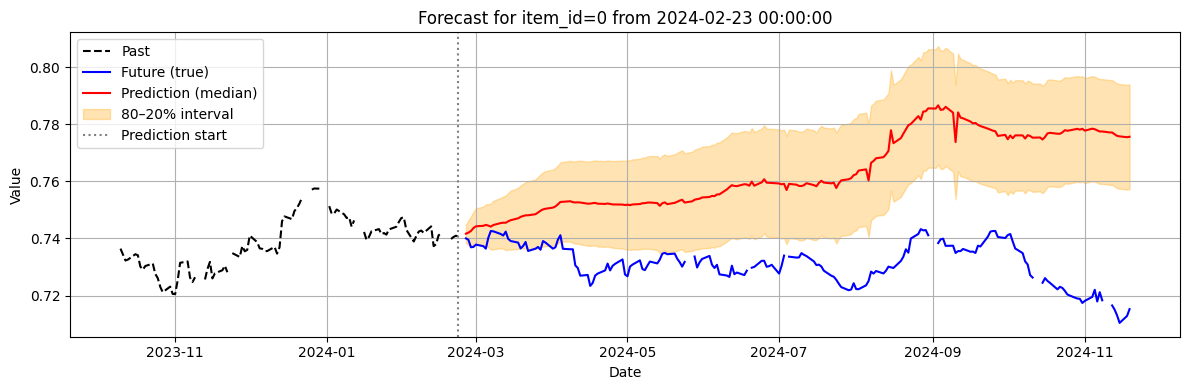

In [162]:
results["chronos-bolt-finetuned-full_PostprocessorMLE"].item_ids[0].plot_forecasts(300)

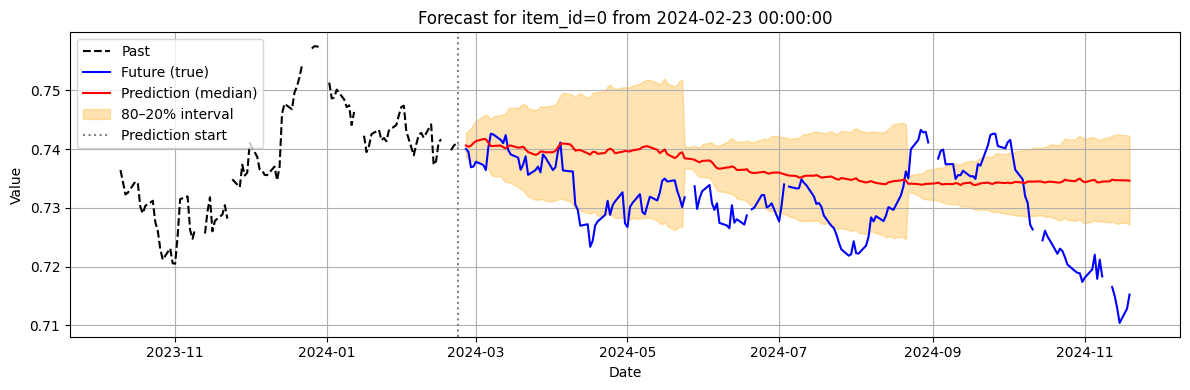

In [163]:
results["chronos-bolt-finetuned-full_Chronos"].item_ids[0].plot_forecasts(300)

Compute CRPS score: 100%|██████████| 5/5 [00:11<00:00,  2.30s/it]


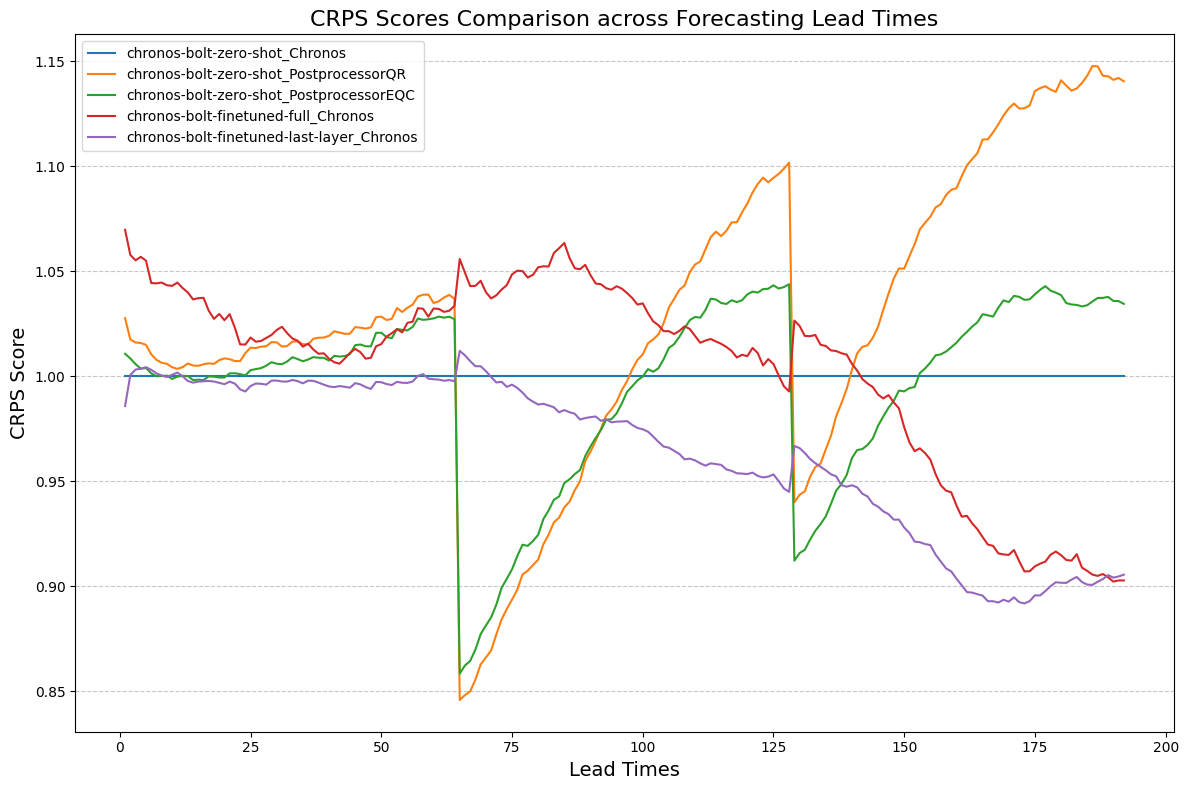

In [165]:
plot_crps_across_lead_times(results, 
                            selected_keys=["chronos-bolt-zero-shot_Chronos", 
                                            "chronos-bolt-zero-shot_PostprocessorQR",
                                            "chronos-bolt-zero-shot_PostprocessorEQC",
                                            "chronos-bolt-finetuned-last-layer_Chronos",
                                            "chronos-bolt-finetuned-full_Chronos",
                                            # "chronos-bolt-finetuned-full_PostprocessorQR", # selected last 3 years for calibration -> bad results
                                            # "naive_rolling_RollingQuantilePredictor"
                                            ],
                            reference_predictions="chronos-bolt-zero-shot_Chronos")

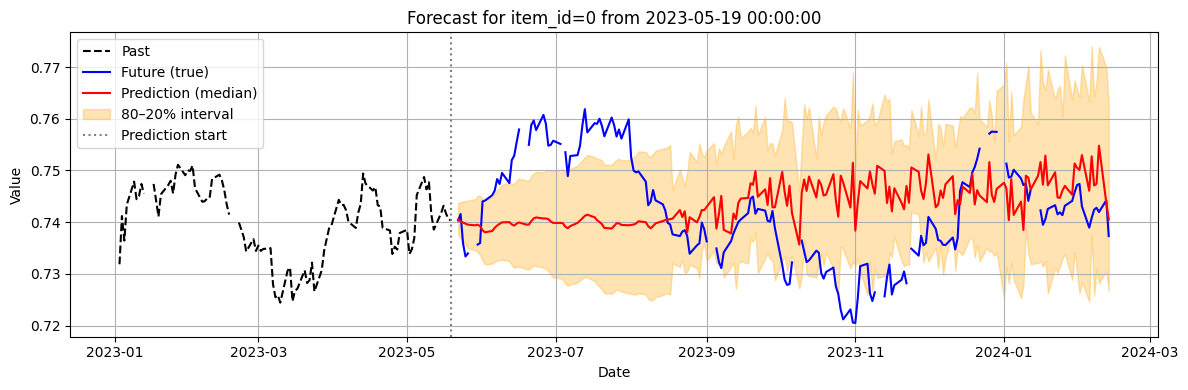

In [10]:
results["chronos-bolt-zero-shot-sampling_Chronos"].item_ids[0].plot_forecasts(start=100)

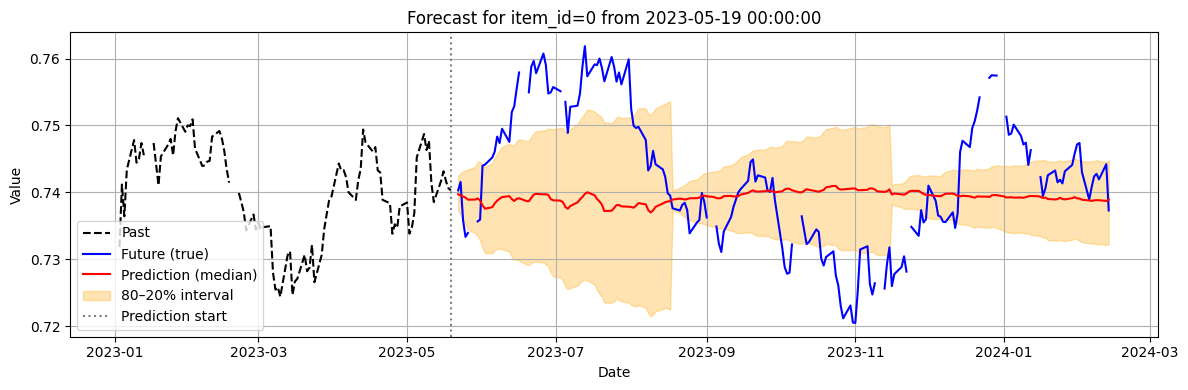

In [166]:
results["chronos-bolt-finetuned-last-layer_Chronos"].item_ids[0].plot_forecasts(start=100)

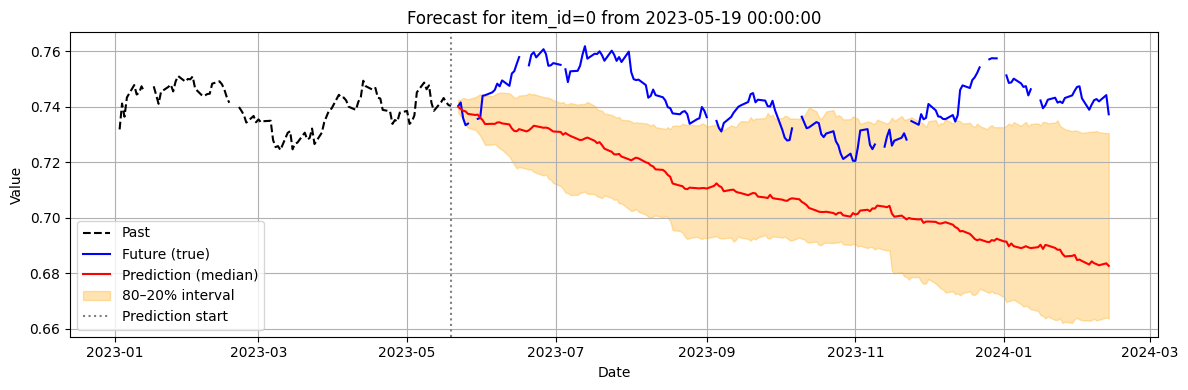

In [167]:
results["chronos-bolt-finetuned-full_PostprocessorEQC"].item_ids[0].plot_forecasts(start=100)

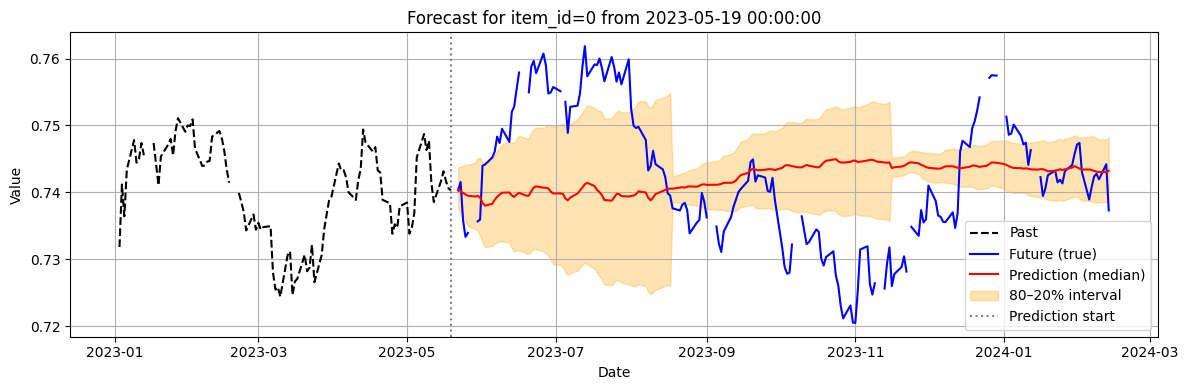

In [168]:
results["chronos-bolt-zero-shot_Chronos"].item_ids[0].plot_forecasts(start=100)

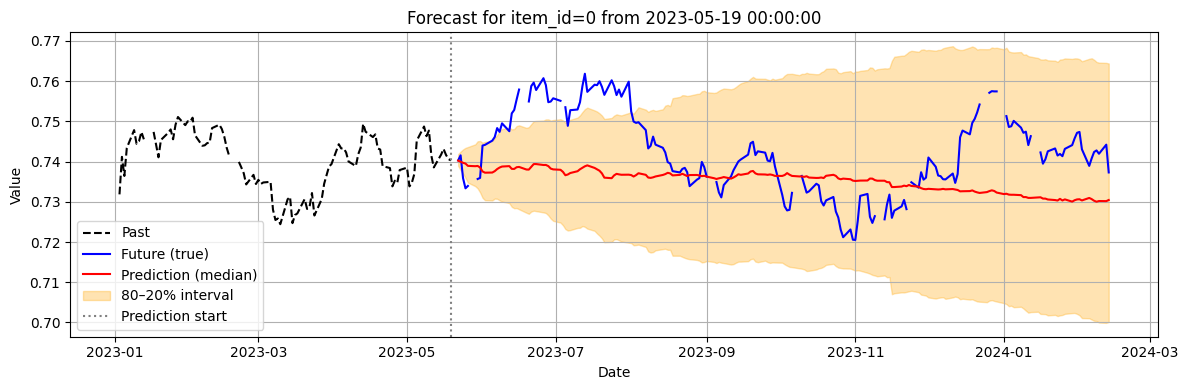

In [169]:
results["chronos-bolt-zero-shot_PostprocessorEQC"].item_ids[0].plot_forecasts(start=100)

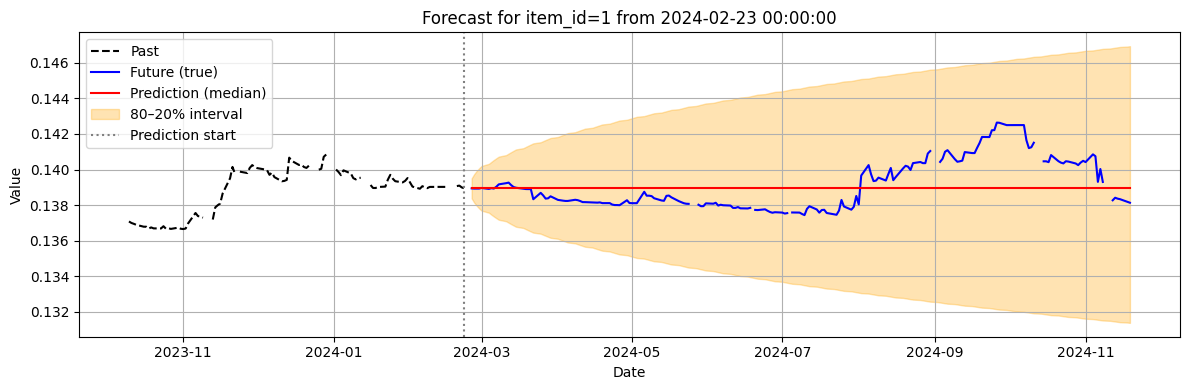

In [174]:
results["random_walk_RandomWalkBenchmark"].item_ids[1].plot_forecasts(start=300)

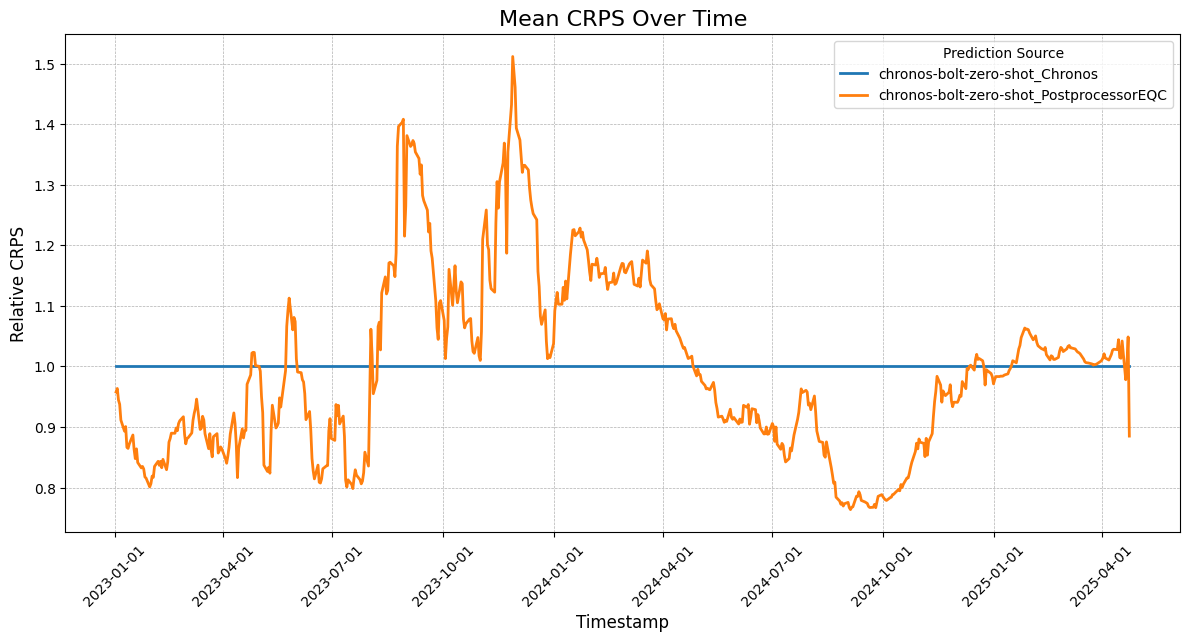

In [ ]:
# update offset not only once on a calibration dataset but continously update it
plot_crps(predictions=results, selected_keys=["chronos-bolt-zero-shot_PostprocessorEQC", "chronos-bolt-zero-shot_Chronos"], reference_predictions="chronos-bolt-zero-shot_Chronos")